In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid")

In [3]:
dfGenEdad = pd.read_csv("fiuba_2_postulantes_genero_y_edad.csv")
dfAvisos = pd.read_csv("fiuba_5_avisos_online.csv")
dfAvisosDet = pd.read_csv("fiuba_6_avisos_detalle.csv")
dfPostu = pd.read_csv("fiuba_4_postulaciones.csv")
dfVistas = pd.read_csv("fiuba_5_avisos_online.csv")
dfEdu = pd.read_csv("fiuba_1_postulantes_educacion.csv")

In [4]:
dfGenEdadEdu = pd.merge(dfGenEdad,dfEdu,how = 'inner', on = "idpostulante")
dfGenEdadEdu["nombre"].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [5]:
def filtroDeRepetidos(df):
    #si hay mas de un estado :Abandonad>Graduado>En Curso
    dft1 = df[df["estado"]=="Abandonado"]
    dft2 = df[df["estado"]=="Graduado"]
    dft3 = df[df["estado"]=="En Curso"]
    df = pd.concat([dft1,dft2[~dft2["idpostulante"].isin(dft1["idpostulante"])]])
    df = pd.concat([df,dft3[~dft3["idpostulante"].isin(df["idpostulante"])]])
    return df
#aislo cada caso
Sec = dfGenEdadEdu.loc[dfGenEdadEdu['nombre']=="Secundario"]
Uni = dfGenEdadEdu.loc[dfGenEdadEdu['nombre']=="Universitario"]
Ter = dfGenEdadEdu.loc[dfGenEdadEdu['nombre']=="Terciario/Técnico"]
Pos = dfGenEdadEdu.loc[dfGenEdadEdu['nombre']=="Posgrado"]
Mas = dfGenEdadEdu.loc[dfGenEdadEdu['nombre']=="Master"]
Doc = dfGenEdadEdu.loc[dfGenEdadEdu['nombre']=="Doctorado"]

Sec = filtroDeRepetidos(Sec)
Uni = filtroDeRepetidos(Uni)
Ter = filtroDeRepetidos(Ter)
Pos = filtroDeRepetidos(Pos)
Mas = filtroDeRepetidos(Mas)
Doc = filtroDeRepetidos(Doc)
#me quedo con el mas grande, doc>master>posgrado...
Doc = pd.concat([Doc,Mas[~Mas["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Pos[~Pos["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Uni[~Uni["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Ter[~Ter["idpostulante"].isin(Doc["idpostulante"])]])
Doc = pd.concat([Doc,Sec[~Sec["idpostulante"].isin(Doc["idpostulante"])]])
dfGenEdadEdu = Doc
# todos los id son unicos
dfGenEdadEdu.nunique()
dfGenEdadEdu.to_csv("GenEdadEduNoDuplicados.csv",index="False")

In [6]:
dfTemp = pd.merge ( dfGenEdadEdu,dfPostu,how = 'right',on='idpostulante')
dfTemp.head(5)

,idpostulante,fechanacimiento,sexo,nombre,estado,idaviso,fechapostulacion
0,ek6m5r,1981-01-14,MASC,Doctorado,Abandonado,1112301227,2018-02-16 10:02:53
1,ek6m5r,1981-01-14,MASC,Doctorado,Abandonado,1112297071,2018-02-16 10:03:40
2,ek6m5r,1981-01-14,MASC,Doctorado,Abandonado,1112289827,2018-02-18 12:35:11
3,ek6m5r,1981-01-14,MASC,Doctorado,Abandonado,1112316523,2018-02-20 07:42:25
4,ek6m5r,1981-01-14,MASC,Doctorado,Abandonado,1112339723,2018-02-20 07:44:09


In [7]:
dfTemp = dfTemp.rename(columns = {'nombre':'nivel educativo'})
dfTemp["nivel+estado"] = (dfTemp['nivel educativo']+dfTemp['estado'])
dfGenEdadEdu["nivel+estado"] = (dfGenEdadEdu["nombre"]+dfGenEdadEdu["estado"])

In [13]:

postulacionesXEdu = dfTemp["nivel+estado"].value_counts() / dfGenEdadEdu["nivel+estado"].value_counts()
#postulacionesXEdu = postulacionesXEdu.drop(['OtroAbandonado', 'OtroEn Curso', 'OtroGraduado'])
postulacionesXEdu = postulacionesXEdu[[ 'DoctoradoGraduado', 'DoctoradoEn Curso','DoctoradoAbandonado',
       'MasterGraduado', 'MasterEn Curso','MasterAbandonado' ,
       'PosgradoGraduado', 'PosgradoEn Curso','PosgradoAbandonado' ,'UniversitarioGraduado',
       'UniversitarioEn Curso', 'UniversitarioAbandonado','Terciario/TécnicoGraduado', 'Terciario/TécnicoEn Curso',
        'Terciario/TécnicoAbandonado', 'SecundarioGraduado', 'SecundarioEn Curso' , 'SecundarioAbandonado']]

Text(0,0.5,'nivel educativo(desordeado)')

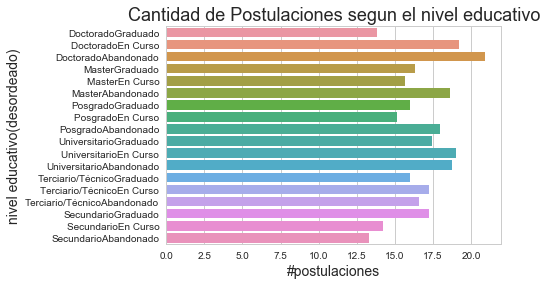

In [14]:
# un grafico inutil
g = sns.barplot(x=(postulacionesXEdu.values),y=postulacionesXEdu.index)
plt.title('Cantidad de Postulaciones segun el nivel educativo',fontsize="18")
plt.xlabel('#postulaciones',fontsize="14")
plt.ylabel("nivel educativo",fontsize="14")

In [ ]:
def Mequedoconelmejor(row):
    if pd.isnull(row['nombre']):
        return 'Sin datos'
    
    

dfEdu



In [ ]:
4